# Challenge 2 : Prediksi Customer Churn menggunakan Machine Learning

# Overview

Pelanggan bebas memilih provider yang mereka inginkan. Mereka dapat pindah dari provider lama (*churn*) ke provider lain yang lebih menarik. Hal ini dapat membuat perusahaan telekomunikasi kehilangan pendapatan.

Supaya pelanggan tidak pindah, perusahaan perlu tahu siapa saja yang kemungkinan besar akan pindah. Caranya dengan melakukan prediksi *churn*.

Prediksi *churn* adalah cara untuk mengetahui kemungkinan pelanggan pindah provider. Dengan mengetahui hal ini, perusahaan bisa mengambil langkah-langkah untuk mencegahnya.

**Goals** <br>
Merancang model *machine learning* untuk memprediksi customer churn

**Dataset Description**


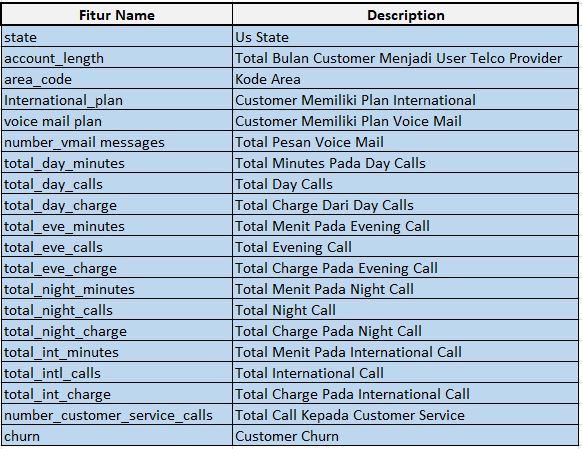

# Data Understanding

In [ ]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output

In [ ]:
#import_data_train
url = 'https://drive.google.com/file/d/1S6VXIDtKuN98kP0pr-PQWfvY2AxJpliS/view'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
dataframe = pd.read_csv(dwn_url)

In [ ]:
#view_column
dataframe.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# Exploratory Data Analysis


In [ ]:
#data_duplicate
print("Jumlah duplikasi data: ", dataframe.duplicated().sum())

Jumlah duplikasi data:  0


In [ ]:
#row_and_column
print("Jumlah (baris, kolom): ", dataframe.shape)


Jumlah (baris, kolom):  (4250, 20)


In [ ]:
#data_summary
list_item = []

for col in dataframe.columns:
    list_item.append([col, dataframe[col].dtype,
                      dataframe[col].isna().sum(),
                      round(100*dataframe[col].isna().sum()/len(dataframe[col]), 2),
                      dataframe[col].nunique(),
                      dataframe[col].unique()[:10]])

dataframe_description = pd.DataFrame(data=list_item, columns=['feature', 'datatype', 'missing_values', 'missing_percentage', 'unique_values_count', 'unique_values'])
dataframe_description

,feature,datatype,missing_values,missing_percentage,unique_values_count,unique_values
0,state,object,0,0.0,51,"[OH, NJ, OK, MA, MO, LA, WV, IN, RI, IA]"
1,account_length,int64,0,0.0,215,"[107, 137, 84, 75, 121, 147, 117, 141, 65, 74]"
2,area_code,object,0,0.0,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,0,0.0,2,"[no, yes]"
4,voice_mail_plan,object,0,0.0,2,"[yes, no]"
5,number_vmail_messages,int64,0,0.0,46,"[26, 0, 24, 37, 27, 33, 39, 25, 30, 41]"
6,total_day_minutes,float64,0,0.0,1843,"[161.6, 243.4, 299.4, 166.7, 218.2, 157.0, 184..."
7,total_day_calls,int64,0,0.0,120,"[123, 114, 71, 113, 88, 79, 97, 84, 137, 127]"
8,total_day_charge,float64,0,0.0,1843,"[27.47, 41.38, 50.9, 28.34, 37.09, 26.69, 31.3..."
9,total_eve_minutes,float64,0,0.0,1773,"[195.5, 121.2, 61.9, 148.3, 348.5, 103.1, 351...."


In [ ]:
#numeric_column
num = []

for col in dataframe.columns:
  if dataframe[col].dtype != object:
    num.append(col)

print('Jumlah kolom yang berisi data numerik :', len(num), 'kolom')
print("\n", num)

Jumlah kolom yang berisi data numerik : 15 kolom

 ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
#categorical_column
cat = []

for col in dataframe.columns:
  if dataframe[col].dtype == object:
    cat.append(col)

print(f'Jumlah kolom yang berisi data kategori :{len(cat)} kolom')
print("\n", cat)

Jumlah kolom yang berisi data kategori :5 kolom

 ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


**Recap**
1.   Dataset terdiri dari 4250 baris dan 20 kolom
2.   Terdapat 15 kolom dengan tipe numerik
3. Terdapat 5 kolom dengan tipe kategori
4. Dataset tidak memiliki *missing value*
5. Datase tidak memiliki duplikasi data



**Statistical Snapshot**


In [ ]:
#descriptive_statistic_numerical
dataframe.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.24,39.70,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,4250.0,7.63,13.44,0.0,0.00,0.00,16.00,52.00
total_day_minutes,4250.0,180.26,54.01,0.0,143.33,180.45,216.20,351.50
total_day_calls,4250.0,99.91,19.85,0.0,87.00,100.00,113.00,165.00
total_day_charge,4250.0,30.64,9.18,0.0,24.36,30.68,36.75,59.76
total_eve_minutes,4250.0,200.17,50.25,0.0,165.92,200.70,233.78,359.30
total_eve_calls,4250.0,100.18,19.91,0.0,87.00,100.00,114.00,170.00
total_eve_charge,4250.0,17.02,4.27,0.0,14.10,17.06,19.87,30.54
total_night_minutes,4250.0,200.53,50.35,0.0,167.22,200.45,234.70,395.00
total_night_calls,4250.0,99.84,20.09,0.0,86.00,100.00,113.00,175.00


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#descriptive_statistic_categorical
dataframe[cat].describe().T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


**Recap** <br>
Pada hasil deskripsi *top* menunjukan value "no" pada kolom churn. Ini menunjukkan bahwa nilai yang paling umum atau paling sering muncul dalam kolom 'churn' adalah 'no'. Sehingga dapat disimpulkan bahwa rata-rata pelanggan tidak *churn*



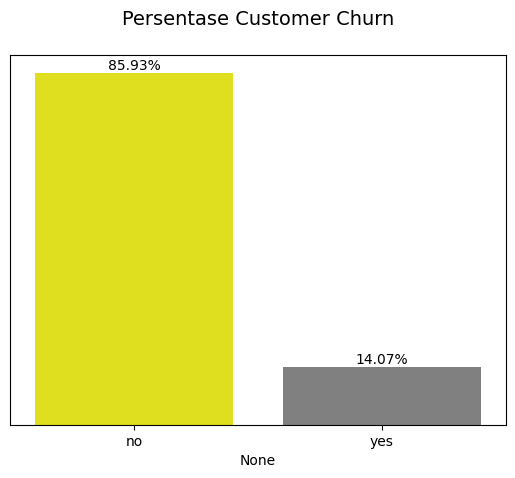

In [ ]:
counts = dataframe['churn'].value_counts()

percentages = counts / counts.sum() * 100

ax = sns.barplot(x=counts.index, y=percentages, palette =['yellow', 'grey'])

for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

ax.set_yticks([])
plt.ylabel('')
plt.title('Persentase Customer Churn\n', fontsize=14)
plt.show()

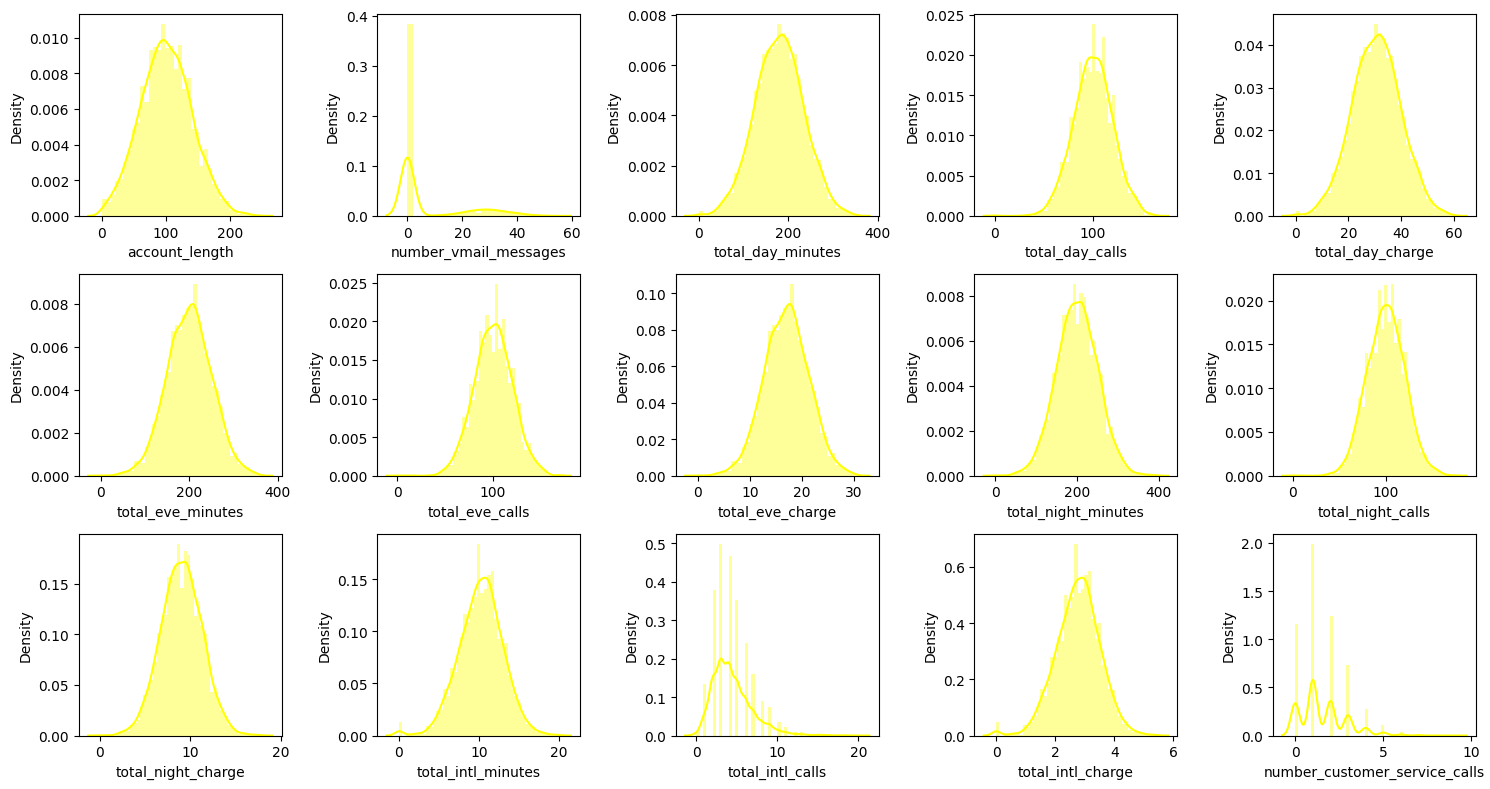

In [ ]:
#univariate_analysis
plt.figure(figsize=(15, 8))

for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.distplot(dataframe[num[i]], color='yellow')
    plt.tight_layout()

**Recap** <br>

1.   Terlihat pada grafik yang telah ditampilkan, bahwa rata-rata seluruh fitur menunjukkan hasil **terdistribusi normal**.
2.   Kolom number_vmail_massages, total_intl_calls dan number_customer_sevice_calls mengalami **positively skewed**.


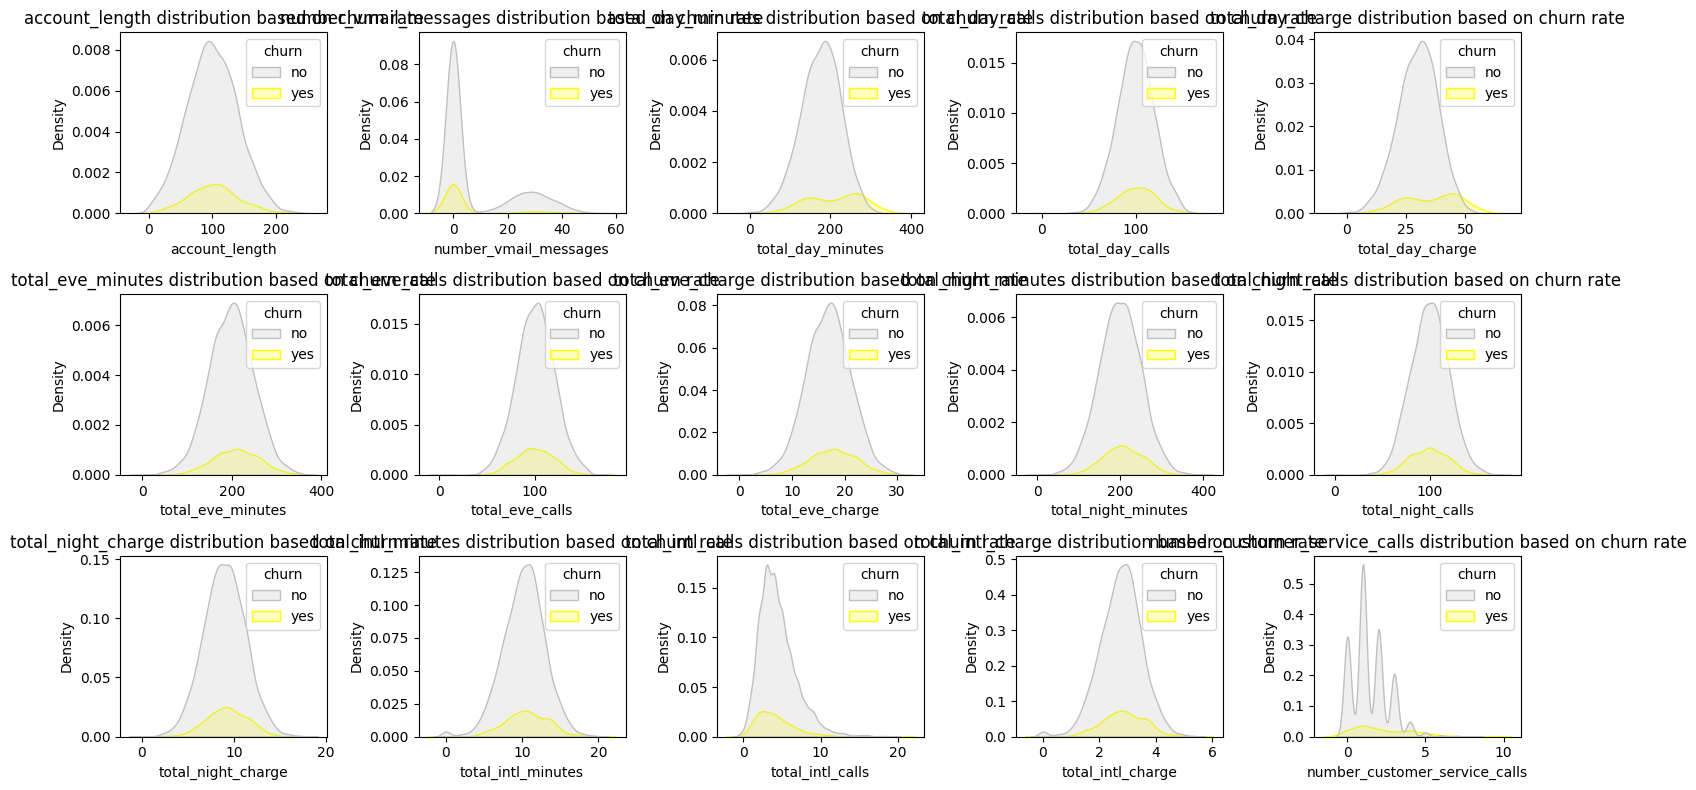

In [ ]:
#bivariate_analysis
plt.figure(figsize=(15, 8))

for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(dataframe, x=dataframe[num[i]], hue=dataframe['churn'], palette = ['silver', 'yellow'],
                fill=True).set(title=f'{num[i]} distribution based on churn rate')
    plt.tight_layout()

In [ ]:
#ratio_and_pivoting_calculation
def ratio_with_target(feats):
  ratio = dataframe.groupby([feats,'churn']).agg({'account_length':'count'}).reset_index()
  ratio['ratio'] = ratio.groupby(feats).apply(lambda x: round(x.account_length/x.account_length.sum() *100, 0)).values.astype(int)
  ratio = ratio.pivot_table(index=feats, columns='churn', values='ratio')
  ratio = ratio.sort_values(by=['yes'], ascending=False)
  return ratio

#visualization
def visualization(column, title):
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    #percentage
    ax[1].set_title(f'Rasio Churn berdasarkan {title}\n', fontsize=14)
    ratio_with_target(column).plot(kind='barh', stacked=True, color = ['silver', 'yellow'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2),
                        ha='center', va='center', fontsize=14)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    #count
    ax[0].set_title(f'Churn berdasarkan {title}\n', fontsize=14)
    sns.countplot(x=column, data = dataframe, hue = 'churn', palette = ['silver', 'yellow'] , ax=ax[0])
    ax[0].bar_label(ax[0].containers[0], fontsize=14)
    ax[0].bar_label(ax[0].containers[1], fontsize=14)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')

    plt.tight_layout()
    plt.show()

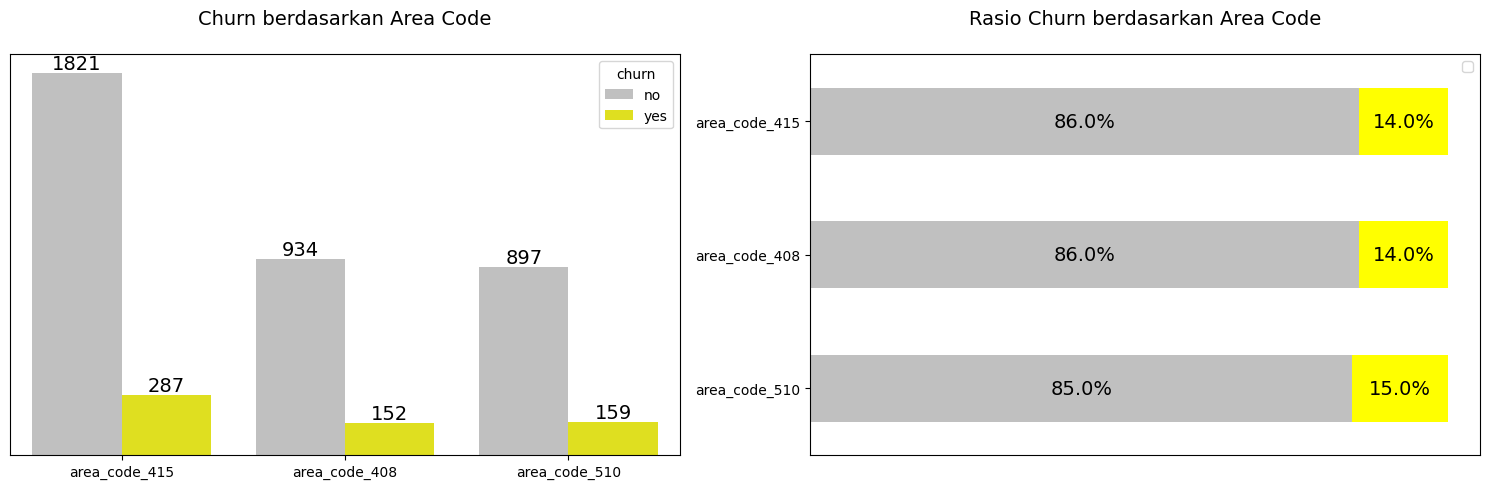

In [ ]:
visualization('area_code', 'Area Code')

**Recap** <br>
Pelanggan terbanyak diketahui berasal dari Area dengan kode 415 dengan rasio pelanggan yang mengalami *churn* berada di sekitar 14 hingga 15 persen (14-15%)


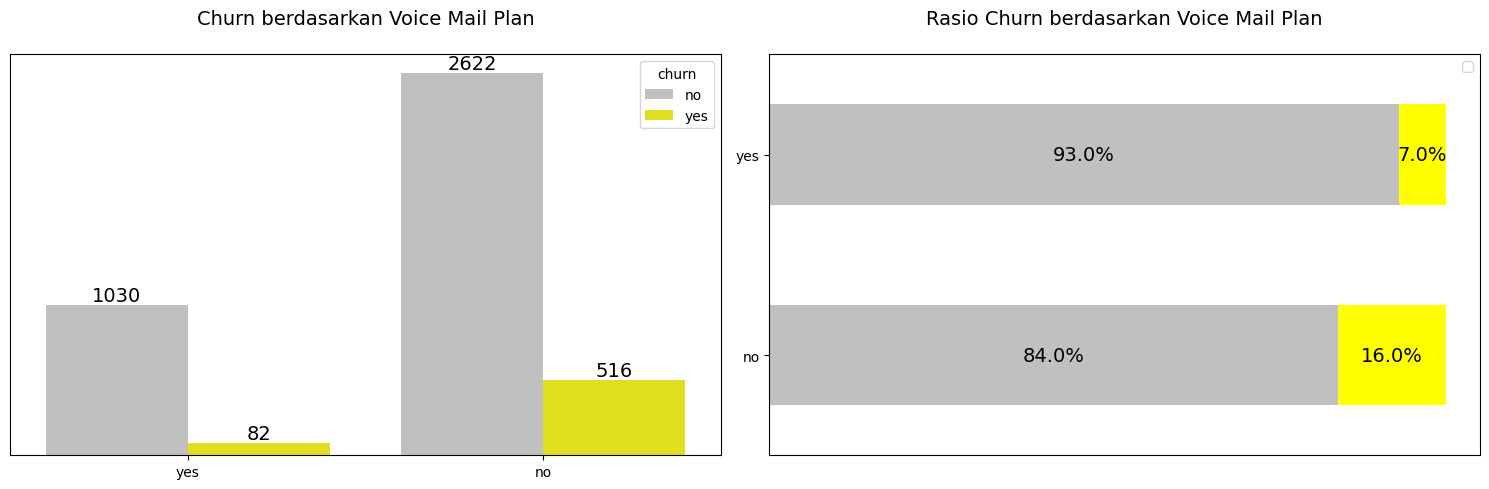

In [ ]:
visualization('voice_mail_plan', 'Voice Mail Plan')

**Recap** <br>
Diketahui jumlah pengguna yang memiliki voice mail plan sangat rendah, namun memiliki tingkat churn paling tinggi yaitu 16% dibandingkan dengan yang tidak memiliki.

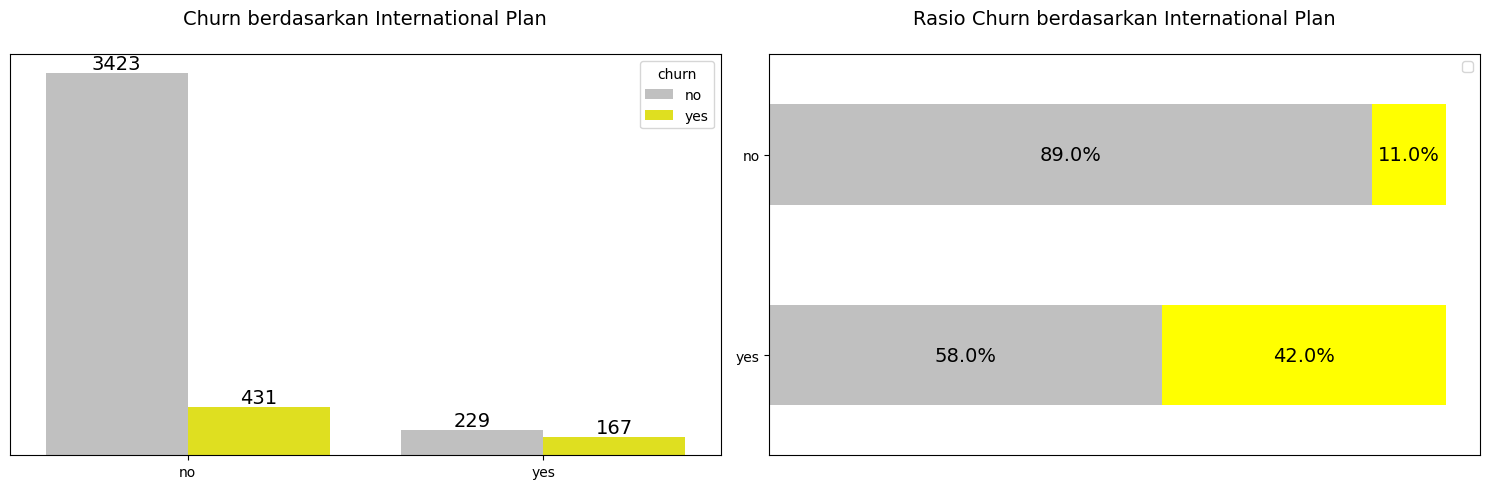

In [ ]:
visualization('international_plan', 'International Plan')

**Recap** <br>
Meskipun angka pelanggan yang memiliki international plan cukup rendah, namun 42% nya diketahui adalah churn.

Rata-rata biaya per menit dalam panggilan siang hari: 0.17
Rata-rata panggilan per-menit di siang hari: 1.80

Rata-rata biaya per menit dalam panggilan malam hari: 0.05
Rata-rata panggilan per-menit di malam hari: 2.01


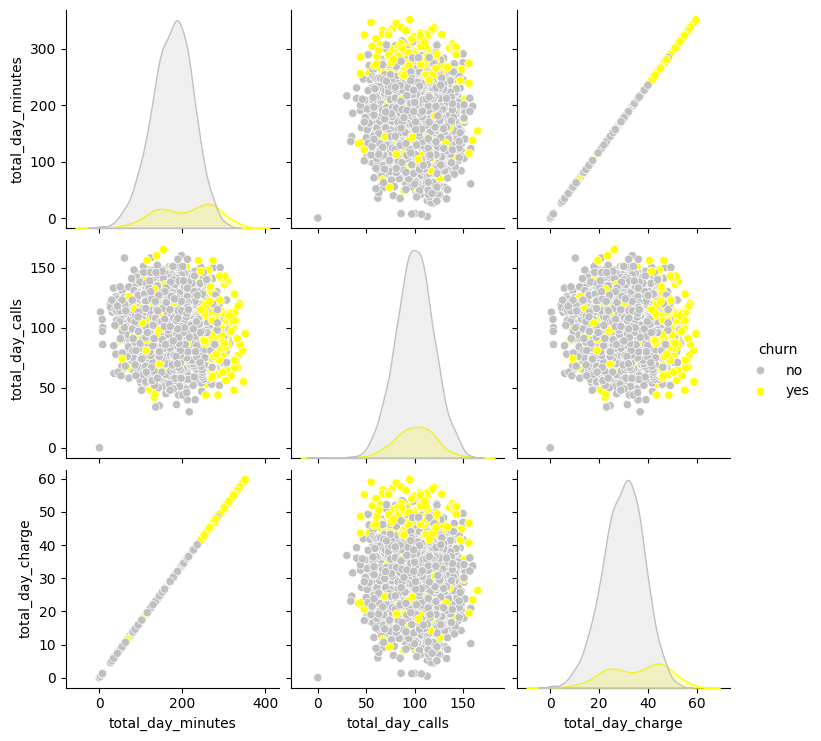

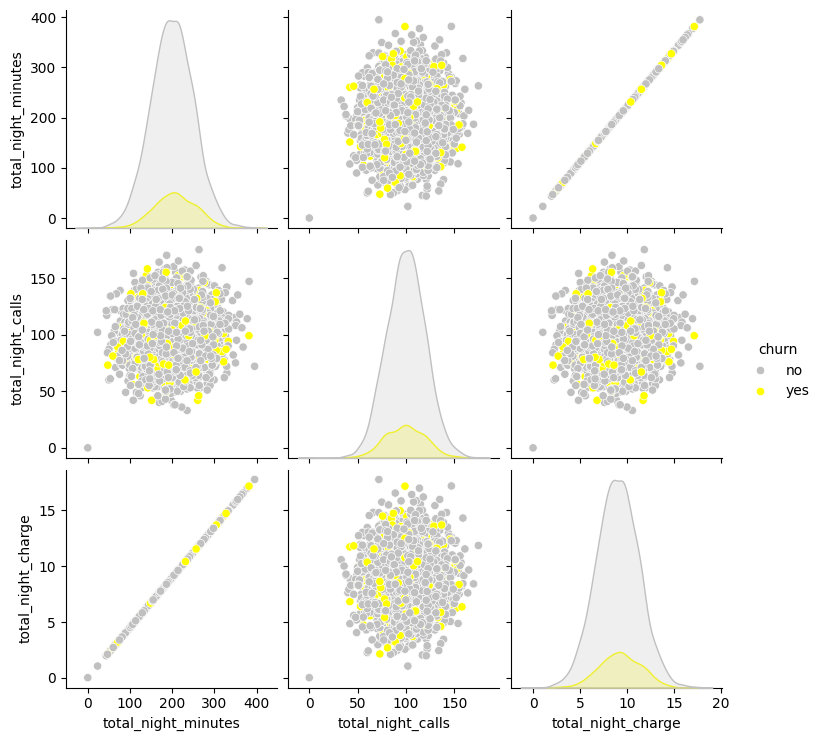

In [ ]:
#multivariate_analysis

#call_in_days
sns.pairplot(dataframe[['total_day_minutes', 'total_day_calls', 'total_day_charge', 'churn']], hue = 'churn', palette=['silver', 'yellow'])

print('Rata-rata biaya per menit dalam panggilan siang hari: {:.2f}'.format(dataframe['total_day_charge'].mean()/dataframe['total_day_minutes'].mean()))
print('Rata-rata panggilan per-menit di siang hari: {:.2f}'.format(dataframe['total_day_minutes'].mean()/dataframe['total_day_calls'].mean()))

#call_in_night
sns.pairplot(dataframe[['total_night_minutes', 'total_night_calls', 'total_night_charge', 'churn']], hue = 'churn', palette=['silver', 'yellow'])

print('\nRata-rata biaya per menit dalam panggilan malam hari: {:.2f}'.format(dataframe['total_night_charge'].mean()/dataframe['total_night_minutes'].mean()))
print('Rata-rata panggilan per-menit di malam hari: {:.2f}'.format(dataframe['total_night_minutes'].mean()/dataframe['total_night_calls'].mean()))

Rata-rata biaya per-menit: 0.27
Rata-rata panggilan per-menit: 2.32


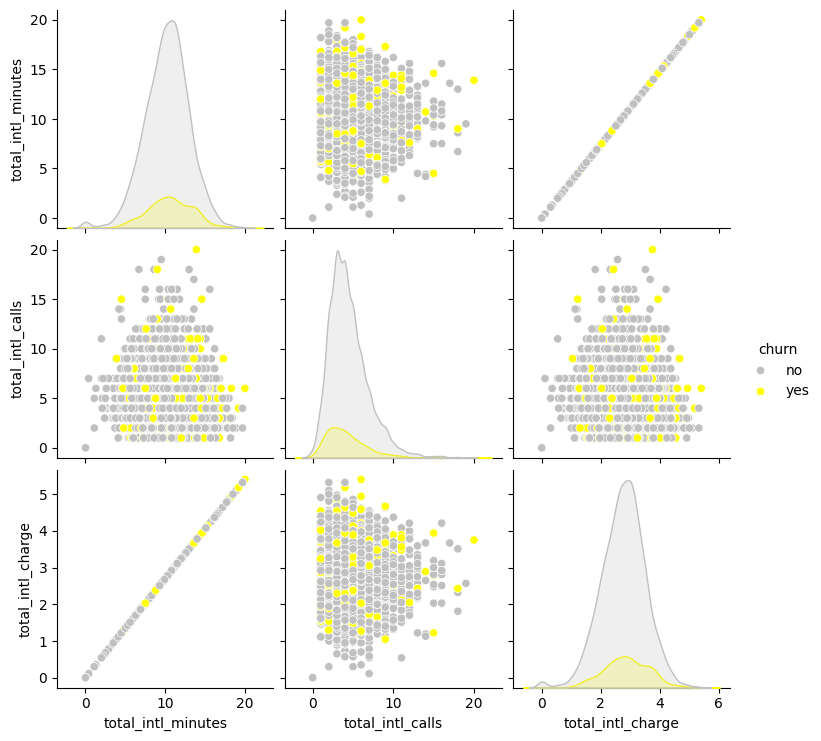

In [ ]:
#international_plan
sns.pairplot(dataframe[['total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn']], hue = 'churn', palette=['silver', 'yellow'])

print('Rata-rata biaya per-menit: {:.2f}'.format(dataframe['total_intl_charge'].mean()/dataframe['total_intl_minutes'].mean()))
print('Rata-rata panggilan per-menit: {:.2f}'.format(dataframe['total_intl_minutes'].mean()/dataframe['total_intl_calls'].mean()))

**Recap** <br>
Analisis multivariat bertujuan untuk memahami struktur yang mendasari data dan faktor apa saja yang mempengaruhi variasi dalam data. Terdapat beberapa variasi seperti panggilan di siang hari, malam hari dan panggilan internasional.

# Data Preprocessing


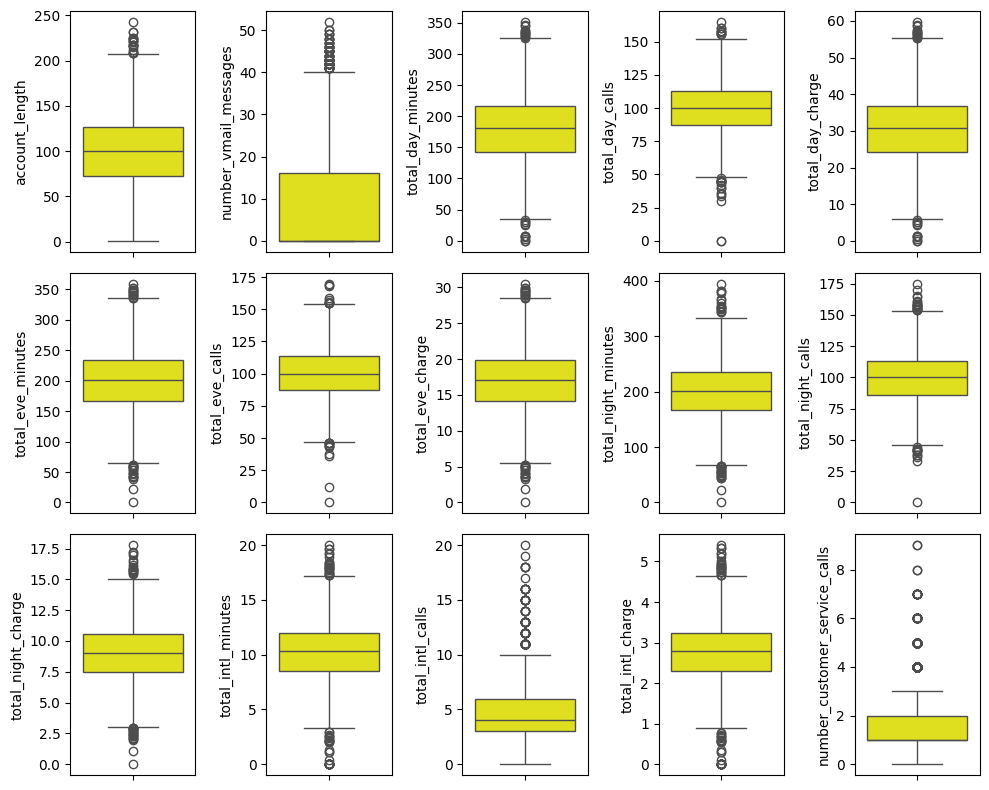

In [ ]:
#outlier_check
plt.figure(figsize=(10, 8))
for i in range(0, len(num)):
  plt.subplot(3, 5, i+1)
  col_name = num[i]
  sns.boxplot(y=dataframe[col_name], color='yellow')
  plt.tight_layout()

In [ ]:
#encoding
df_en = dataframe.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_en.columns:
    if df_en[col].dtype == 'O':
        df_en[col] = le.fit_transform(df_en[col])

In [ ]:
df_en['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

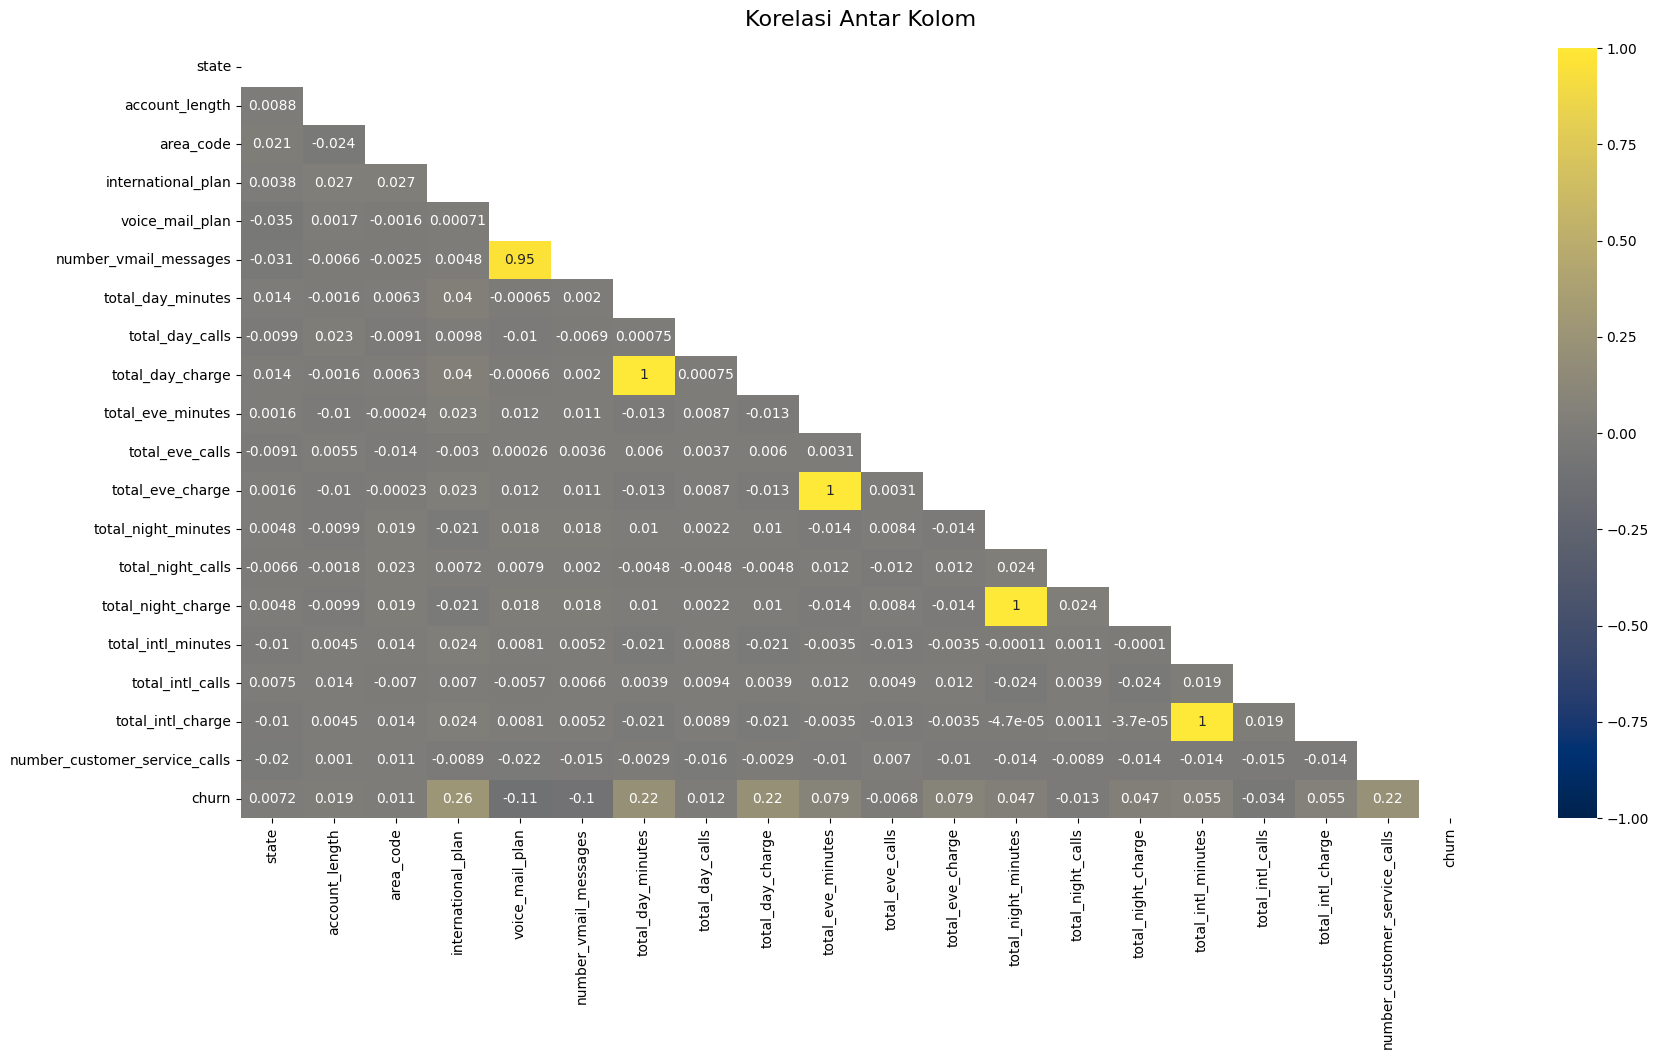

In [ ]:
plt.figure(figsize=(20, 10))
corr_matrix = df_en.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Menggunakan bool langsung
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='cividis')
heatmap.set_title('Korelasi Antar Kolom', fontdict={'fontsize':16}, pad=16)
plt.show()

**Recap** <br>
Outlier dalam data saat ini tampaknya berada dalam batas yang dapat diterima, sehingga tidak memerlukan handling secara mendalam.

In [ ]:
redundan_feats = ['total_day_minutes','total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'number_vmail_messages', 'state']
df_en.drop(columns=redundan_feats, inplace=True)

df_en.corr().abs()['churn'].sort_values(ascending=False)

churn                            1.000000
international_plan               0.259053
number_customer_service_calls    0.221220
total_day_charge                 0.215263
voice_mail_plan                  0.114643
total_eve_charge                 0.078852
total_intl_charge                0.055177
total_night_charge               0.046641
total_intl_calls                 0.034334
account_length                   0.019378
total_night_calls                0.012699
total_day_calls                  0.011640
area_code                        0.010696
total_eve_calls                  0.006817
Name: churn, dtype: float64

In [ ]:
#feature_for_modelling
df_en.sample(5).T

,2488,2162,2930,3,1675
account_length,31.00,19.00,90.00,75.00,49.00
area_code,1.00,2.00,1.00,1.00,1.00
international_plan,0.00,0.00,0.00,1.00,1.00
voice_mail_plan,0.00,0.00,0.00,0.00,0.00
total_day_calls,129.00,116.00,58.00,113.00,92.00
total_day_charge,16.58,44.10,30.60,28.34,40.43
total_eve_calls,78.00,109.00,88.00,122.00,119.00
total_eve_charge,22.13,22.92,19.50,12.61,17.76
total_night_calls,100.00,130.00,110.00,121.00,86.00
total_night_charge,3.99,7.89,7.30,8.41,7.55


# Modelling

In [ ]:
df_model = df_en.copy()

X = df_model.drop(columns='churn').copy()
y = df_model['churn'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(2975, 13) (1275, 13)


In [ ]:
y_train.value_counts()

0    2550
1     425
Name: churn, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#define_function
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    #label_prediction
    y_pred = model.predict(X_test)

    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    #model_evaluation_using_classification report
    report = (classification_report(y_test, y_pred))

    #AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

from sklearn.metrics import confusion_matrix

def c_matrix_viz (model) :
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    #set labels for the matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    #visualization
    plt.figure(figsize=(5,3))
    sns.set(font_scale=0.8) # for label size
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='cividis', annot_kws={'size': 12},
                yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

from sklearn import metrics

def plot_roc(model, X_test, y_test):
    sns.set_theme(style='whitegrid')
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])

    auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='yellow', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

**Logistic Regression**

In [ ]:
#LOGISTIC REGRESSION
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring= 'recall')
print('Recall:', lr_model.mean().round(4))
print('Std:', lr_model.std().round(4))

Recall: 0.7426
Std: 0.0528


In [ ]:
#Hyperparameter Tuning
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga'] }

model = LogisticRegression(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True,random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1102
           1       0.63      0.21      0.32       173

    accuracy                           0.88      1275
   macro avg       0.76      0.60      0.63      1275
weighted avg       0.85      0.88      0.85      1275

------------------------------------------------------- 

AUC Test score: 0.8371
AUC Train scores: 0.8254
------------------------------------------------------- 



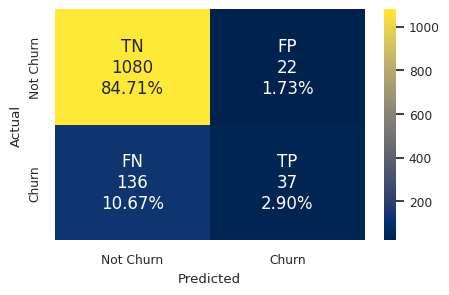

In [ ]:
#predict & evaluation
predict(grid_search)

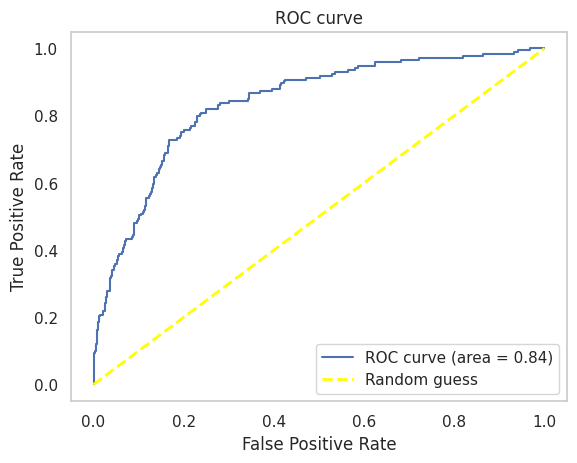

In [ ]:
#ROC_curve
plot_roc(grid_search, X_test, y_test)

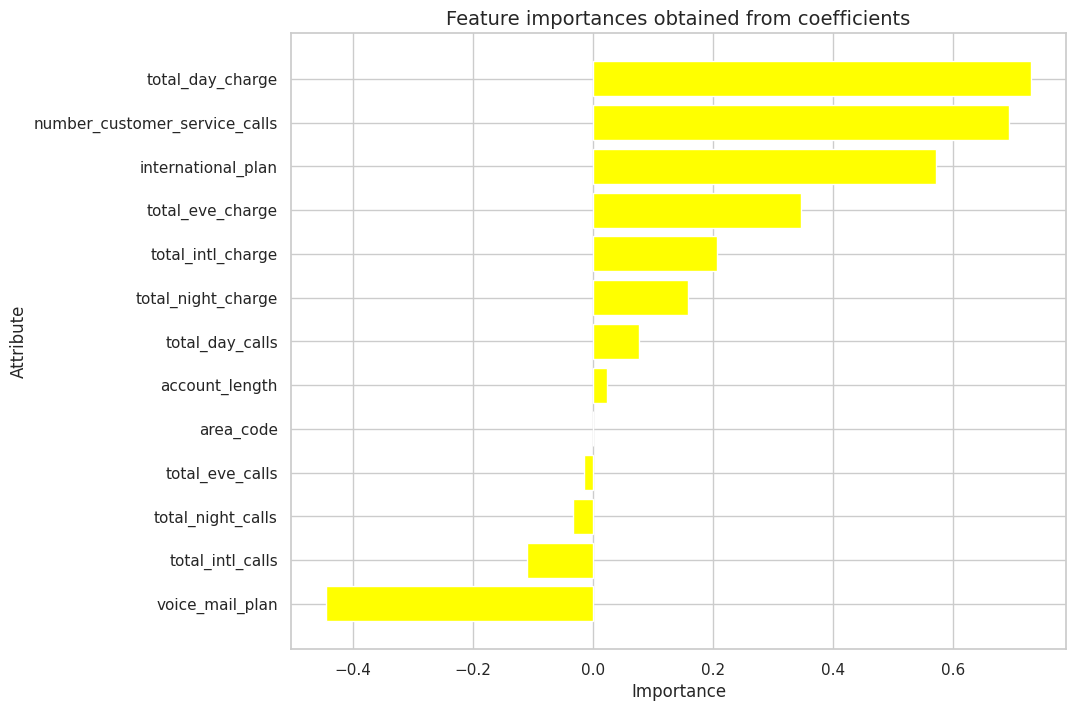

In [ ]:
# Melakukan fitting model regresi logistik
model.fit(X_train, y_train)

# Mengambil pentingnya fitur dari koefisien model
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})

# Mengurutkan fitur berdasarkan kepentingannya
importances = importances.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importances['Attribute'], importances['Importance'], color='yellow')
plt.title('Feature importances obtained from coefficients', size=14)
plt.xlabel('Importance')
plt.ylabel('Attribute')
plt.show()

**Random Forest Classifier**



In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring= 'recall')
print('RFC - Recall Mean:', rf_model.mean().round(4))
print('RFC - Std:', rf_model.std().round(4))

Recall Mean: 0.6798
Std: 0.0475


In [ ]:
params ={'n_estimators': [100, 200, 300],
         'max_depth': [5, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1102
           1       0.70      0.83      0.76       173

    accuracy                           0.93      1275
   macro avg       0.84      0.89      0.86      1275
weighted avg       0.94      0.93      0.93      1275

------------------------------------------------------- 

AUC Test score: 0.9255
AUC Train scores: 0.9419
------------------------------------------------------- 



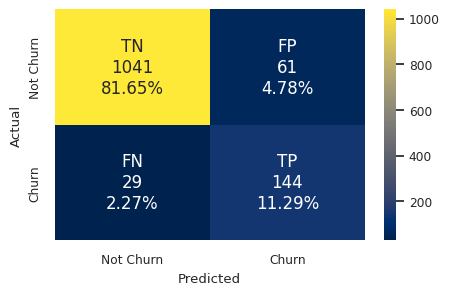

In [ ]:
predict(grid_search)

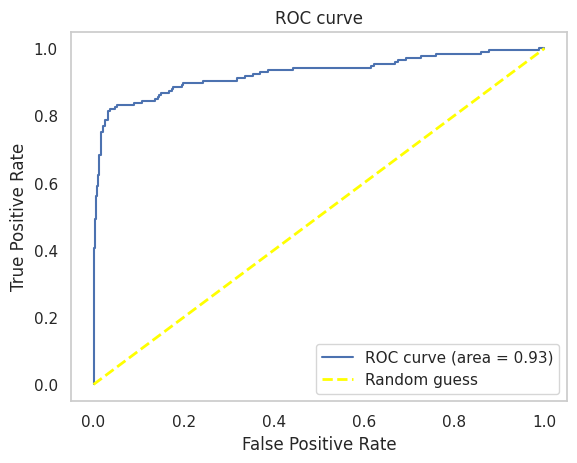

In [ ]:
plot_roc(grid_search, X_test, y_test)

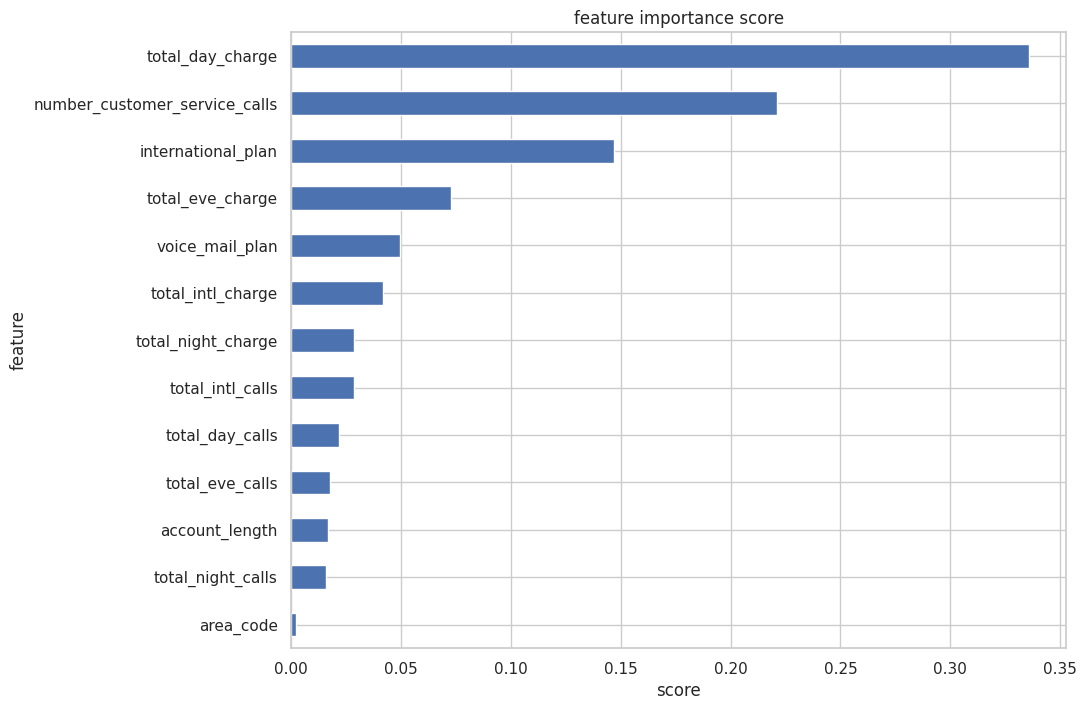

In [ ]:
show_feature_importance(grid_search.best_estimator_)

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_model = cross_val_score(knn, X, y, cv=kfold, scoring='recall')
print('KNN - Recall:', knn_model.mean().round(4))
print('KNN - Std:', knn_model.std().round(4))

# Hyperparameter Tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# GridSearchCV
knn_grid_search = model_selection.GridSearchCV(knn, param_grid=knn_params, scoring='recall', cv=kfold)
knn_grid_search.fit(X_train, y_train)
print('KNN - Best parameters: ', knn_grid_search.best_params_)

KNN - Recall: 0.0719
KNN - Std: 0.0282
KNN - Best parameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1102
           1       0.81      0.36      0.50       173

    accuracy                           0.90      1275
   macro avg       0.86      0.67      0.72      1275
weighted avg       0.89      0.90      0.88      1275

------------------------------------------------------- 

AUC Test score: 0.806
AUC Train scores: 0.9654
------------------------------------------------------- 



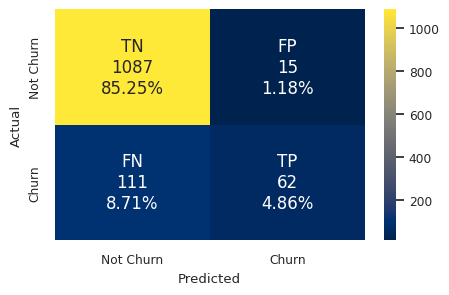

In [ ]:
predict(knn_grid_search)

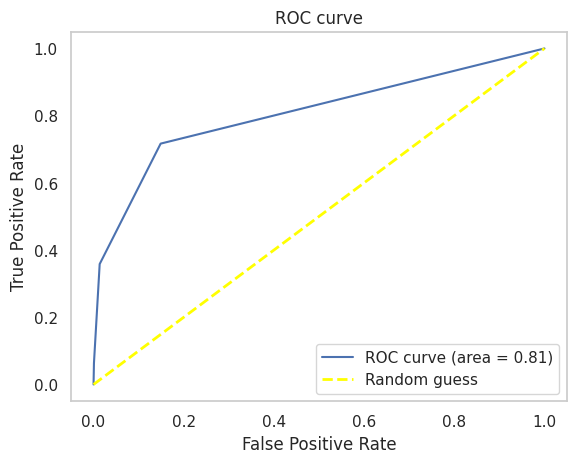

In [ ]:
plot_roc(knn_grid_search, X_test, y_test)

# Data Test


In [ ]:
url_test = 'https://drive.google.com/file/d/1lcPBOHjqtkz4xgwSdiak4CL2cLyip3AT/view'
file_id_test = url_test.split('/')[-2]
dwn_url_test = 'https://drive.google.com/uc?id=' + file_id_test
# -------------------------------
df_test = pd.read_csv(dwn_url_test)

In [ ]:
df_test.sample(5)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
517,518,NJ,113,area_code_408,yes,no,0,122.4,98,20.81,223.8,116,19.02,267.5,148,12.04,11.6,5,3.13,3
125,126,OR,69,area_code_415,no,no,0,167.5,76,28.48,242.1,92,20.58,101.2,103,4.55,11.4,4,3.08,2
680,681,ME,62,area_code_510,no,no,0,211.3,100,35.92,228.4,91,19.41,217.1,77,9.77,6.3,5,1.70,0
246,247,TX,159,area_code_415,no,no,0,87.7,103,14.91,278.2,97,23.65,170.6,93,7.68,10.5,10,2.84,1
123,124,MT,78,area_code_415,no,no,0,191.7,122,32.59,241.4,88,20.52,203.5,86,9.16,9.1,5,2.46,1


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
feats =['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'total_day_calls', 'total_day_charge', 'total_eve_calls',
        'total_eve_charge', 'total_night_calls', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
X_test1 = df_test[feats]

In [ ]:
le = LabelEncoder()

for col in X_test1.columns:
    if X_test1[col].dtype == 'O':
        X_test1[col] = le.fit_transform(X_test1[col])

In [ ]:
scaler = StandardScaler()
X_test1 = pd.DataFrame(scaler.fit_transform(X_test1), columns=X_test1.columns)

In [ ]:
model_rf = RandomForestClassifier(random_state=42,
                               class_weight='balanced',
                               max_depth = 5,
                               min_samples_leaf = 2,
                               min_samples_split = 10,
                               n_estimators = 300)
model_rf.fit(X_train, y_train)
prediction = model_rf.predict(X_test1)

In [ ]:
df_test1 = pd.read_csv(dwn_url_test)
submission = pd.DataFrame({
        'id': df_test1['id'],
        'churn': prediction
    })
submission.head()

,id,churn
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [ ]:
submission.to_csv('submit.csv', index = False)

In [ ]:
df_test['churn'] = submission['churn']
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
df_test.to_csv('final.csv', index = False)